Libraries

In [434]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [435]:
pd.set_option('display.max_columns', None)

In [436]:
df=pd.read_csv('../data/clean/startup_data_clean2.csv')
df.head()

,state_code,city,name,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,founded_at_year,first_funding_at_year,last_funding_at_year,success
0,CA,San Diego,Bandsintown,active,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,2007,2009,2010,1
1,CA,Los Gatos,TriCipher,active,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,2000,2005,2009,1
2,CA,San Diego,Plixi,active,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,2009,2010,2010,1
3,CA,Cupertino,Solidcore Systems,active,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,2002,2005,2007,1
4,CA,San Francisco,Inhale Digital,notactive,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,2010,2010,2012,0


Checking the imbalance discovered in the EDA

In [437]:
df['success'].value_counts()

1    588
0    335
Name: success, dtype: int64

Seaparting the df into num and cat

In [438]:
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(exclude=[np.number])

In [439]:
df

,state_code,city,name,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,founded_at_year,first_funding_at_year,last_funding_at_year,success
0,CA,San Diego,Bandsintown,active,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,2007,2009,2010,1
1,CA,Los Gatos,TriCipher,active,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,2000,2005,2009,1
2,CA,San Diego,Plixi,active,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,2009,2010,2010,1
3,CA,Cupertino,Solidcore Systems,active,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,2002,2005,2007,1
4,CA,San Francisco,Inhale Digital,notactive,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,2010,2010,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,San Francisco,CoTweet,active,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6.0000,1,1,2009,2009,2009,1
919,MA,Burlington,Reef Point Systems,notactive,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2.6667,1,0,1998,2005,2007,0
920,CA,Sunnyvale,Paracor Medical,notactive,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.0000,1,0,1999,2007,2007,0
921,CA,San Francisco,Causata,active,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0000,1,1,2009,2009,2011,1


checking dtypes of num columns

In [440]:
df_num.dtypes

age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_otherstate                 int64
is_software                   int64
is_web                        int64
is_mobile                     int64
is_enterprise                 int64
is_advertising                int64
is_gamesvideo                 int64
is_ecommerce                  int64
is_biotech                    int64
is_consulting                 int64
is_othercategory              int64
has_VC                        int64
has_angel                     int64
has_roundA                    int64
has_roundB                    int64
has_roundC                  

Boolean columns (1/0) are as numericals let´s not consider them to check the distribution

In [441]:
df_num_wb= df[['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','avg_participants','founded_at_year','first_funding_at_year','last_funding_at_year']]

now the num with only boolean

In [442]:
df_num_b=df[['is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','has_VC','has_angel','has_roundA','has_roundB','has_roundC','has_roundD','is_top500' ]]

In [443]:
df_num_wb.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants,founded_at_year,first_funding_at_year,last_funding_at_year
0,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1.0000,2007,2009,2010
1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,4.7500,2000,2005,2009
2,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,4.0000,2009,2010,2010
3,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,3.3333,2002,2005,2007
4,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1.0000,2010,2010,2012


Checking distributions of numericals columns

I didn´t consider the booleans columns (0/1) becausue it wouldn´t show distribution since there are only 2 values

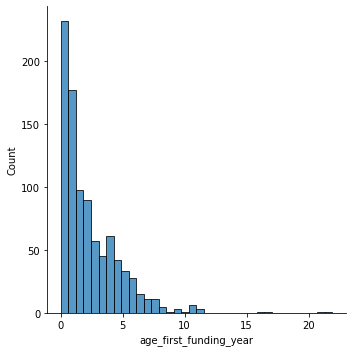

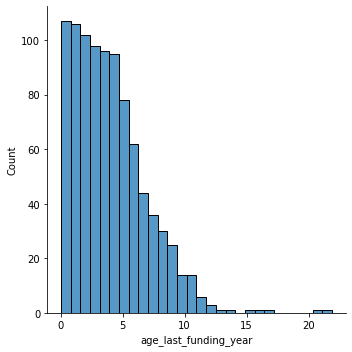

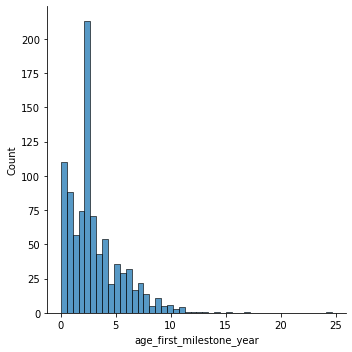

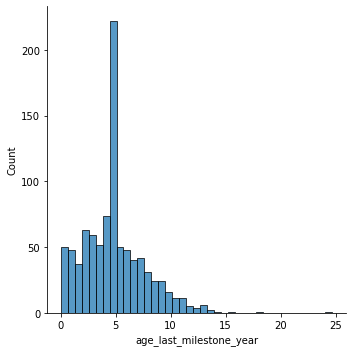

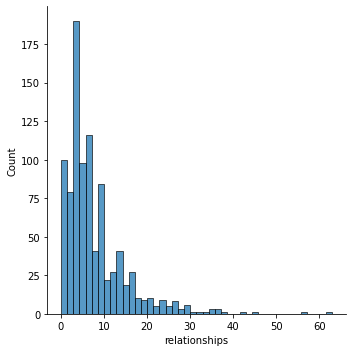

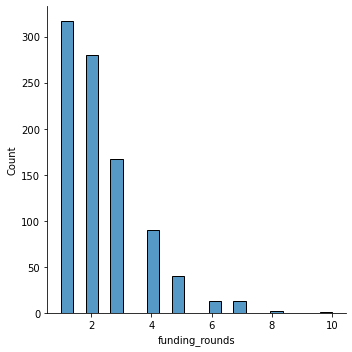

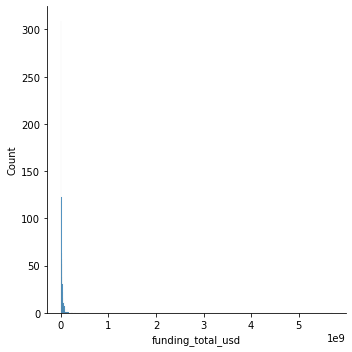

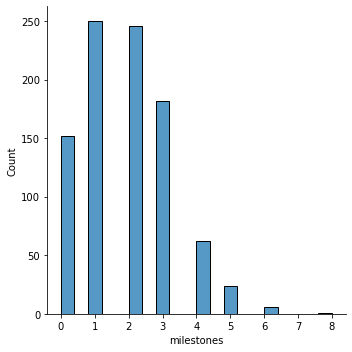

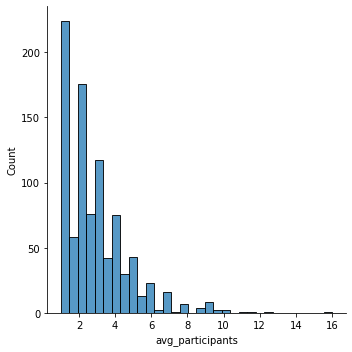

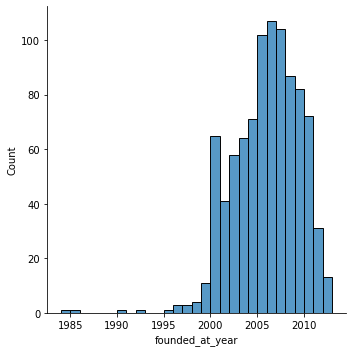

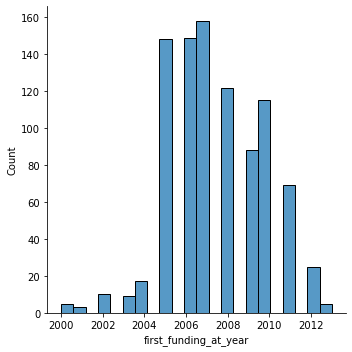

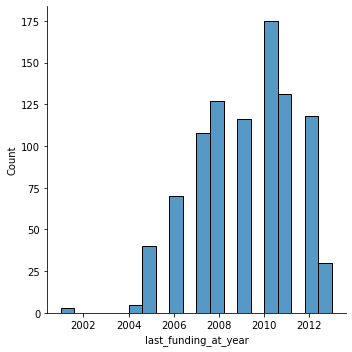

In [444]:
for column_name in df_num_wb:
    sns.displot(df_num_wb[column_name])
    plt.show()

### Split X/Y

In [445]:
y=df_num['success']
X=df_num.drop(['success'], axis=1)

### Train and Test

In [446]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [447]:
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (738, 35)
Shape of the y Train : (738,)
Shape of the X test : (185, 35)
Shape of the y test : (185,)


In [448]:
X_train

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,founded_at_year,first_funding_at_year,last_funding_at_year
287,1.9342,4.0438,2.0027,10.1890,2,2,24300000,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2.5,1,1,2003,2004,2007
174,3.1479,4.8795,5.0027,5.0027,5,2,14000000,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2.0,1,1,2005,2008,2010
516,2.7753,5.0027,4.1644,10.7534,2,3,17400000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,5.0,1,1,2003,2005,2008
189,0.7397,1.1425,0.5808,0.5808,15,2,15700000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,3.0,1,1,2011,2011,2012
787,0.0000,0.0000,0.0000,0.0000,2,1,250000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.0,0,0,2010,2010,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,1.9260,1.9260,1.6685,2.4658,1,1,12000000,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.0,1,1,2011,2012,2012
871,6.2986,6.2986,6.0027,6.0027,9,1,15000000,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3.0,1,1,2001,2007,2007
835,4.0795,4.0795,2.5205,4.4767,0,1,4000000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6.0,1,0,2003,2007,2007
792,0.0822,0.8384,0.0000,4.1836,4,2,4500000,5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,5.5,1,0,2007,2007,2008


Steps: Splitting, correct imbalancing and then standard scalling the numericals

Correcting imbalancing with random over sampler that will increase our minority class (non successful startups)

In [449]:
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

In [450]:
print("Shape of the X Train_res :", X_train_res.shape)
print("Shape of the y Train :", y_train_res.shape)

Shape of the X Train_res : (934, 35)
Shape of the y Train : (934,)


In [451]:
X_train_res

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,founded_at_year,first_funding_at_year,last_funding_at_year
0,1.9342,4.0438,2.0027,10.1890,2,2,24300000,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2.5,1,1,2003,2004,2007
1,3.1479,4.8795,5.0027,5.0027,5,2,14000000,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2.0,1,1,2005,2008,2010
2,2.7753,5.0027,4.1644,10.7534,2,3,17400000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,5.0,1,1,2003,2005,2008
3,0.7397,1.1425,0.5808,0.5808,15,2,15700000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,3.0,1,1,2011,2011,2012
4,0.0000,0.0000,0.0000,0.0000,2,1,250000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.0,0,0,2010,2010,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,1.0685,1.0685,0.8384,3.9918,4,1,4300000,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2.0,1,0,2007,2008,2008
930,0.7479,0.7479,2.5205,4.4767,3,2,100000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.0,0,0,2010,2011,2011
931,4.3151,5.8301,2.5205,4.4767,1,2,16000000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,3.0,1,0,2001,2005,2006
932,5.7836,5.7836,2.0027,2.0027,1,1,10000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,3.0,1,0,2004,2009,2009


Just checking if there are nulls after resampling 

In [452]:
df_na = X_train_res[:].isnull().sum()
df_na

age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consulting               0
is_othercategory            0
has_VC                      0
has_angel                   0
has_roundA                  0
has_roundB                  0
has_roundC                  0
has_roundD                  0
avg_participants            0
is_top500                   0
is_acquired                 0
founded_at_year             0
first_fund

In [453]:
X_train_res.describe()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,founded_at_year,first_funding_at_year,last_funding_at_year
count,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,9.340000e+02,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,2.377480,3.941011,3.035159,4.644567,6.801927,2.260171,2.485987e+07,1.745182,0.524625,0.107066,0.097430,0.049251,0.220557,0.164882,0.147752,0.082441,0.066381,0.069593,0.064240,0.023555,0.041756,0.002141,0.337259,0.345824,0.239829,0.493576,0.373662,0.225910,0.092077,2.734810,0.779443,0.513919,2005.422912,2007.470021,2009.064240
std,2.488185,2.969478,2.630049,2.851464,6.673712,1.411095,1.883734e+08,1.330391,0.499661,0.309363,0.296702,0.216507,0.414844,0.371273,0.355044,0.275183,0.249081,0.254596,0.245311,0.151738,0.200138,0.046250,0.473027,0.475891,0.427208,0.500227,0.484035,0.418404,0.289290,1.787948,0.414844,0.500074,3.502556,2.204123,2.147345
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1984.000000,2000.000000,2001.000000
25%,0.668500,1.647975,1.245875,2.947275,2.000000,1.000000,2.600000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2003.000000,2006.000000,2007.000000
50%,1.501350,3.368500,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.333300,1.000000,1.000000,2006.000000,2007.000000,2009.000000
75%,3.649300,5.652050,4.002700,5.937625,9.000000,3.000000,2.445000e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.500000,1.000000,1.000000,2008.000000,2009.000000,2011.000000
max,21.895900,21.895900,24.684900,24.684900,57.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000,2013.000000,2013.000000,2013.000000


In [454]:
y_train_res.value_counts()

1    467
0    467
Name: success, dtype: int64

##### Imbalanced is fixed, but I still need to work on standarization of the other columns

Separating the X_train_res and X_test with the columns we want to fix the skewness

I separated X train and X test for numerical columns and boolean numerical columns, i will not perform the log and standardization in the boolean since the values are between 0 and 1 only.

In [455]:
X_train_res_log=X_train_res[['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','avg_participants','founded_at_year','first_funding_at_year','last_funding_at_year']]
X_train_res_nlog=X_train_res[['is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','has_VC','has_angel','has_roundA','has_roundB','has_roundC','has_roundD','is_top500','is_acquired']]

X_test_log=X_test[['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','avg_participants','founded_at_year','first_funding_at_year','last_funding_at_year']]
X_test_nlog=X_test[['is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','has_VC','has_angel','has_roundA','has_roundB','has_roundC','has_roundD','is_top500','is_acquired']]

In [289]:
#X_train_res_log=X_train_res
#X_test_log=X_train_res

Checking the skewness before performing log transformation

In [456]:
X_train_res_log.skew().sort_values(ascending=False)

funding_total_usd           29.396696
relationships                2.257454
age_first_funding_year       2.117516
age_first_milestone_year     2.063898
avg_participants             1.760399
funding_rounds               1.472743
age_last_milestone_year      1.190098
age_last_funding_year        1.114298
milestones                   0.608436
first_funding_at_year        0.004682
last_funding_at_year        -0.299548
founded_at_year             -0.711713
dtype: float64

In [457]:
X_test_log.skew().sort_values(ascending=False)

funding_total_usd           5.454621
relationships               2.803957
age_first_funding_year      2.746371
avg_participants            1.738526
age_last_funding_year       1.521359
funding_rounds              1.186994
age_first_milestone_year    1.167251
age_last_milestone_year     0.678459
milestones                  0.634519
first_funding_at_year      -0.039354
last_funding_at_year       -0.187493
founded_at_year            -1.144904
dtype: float64

Checking the minimum value for all columns

In [458]:
X_train_res_log.min(numeric_only = True, axis = 0)


age_first_funding_year          0.0
age_last_funding_year           0.0
age_first_milestone_year        0.0
age_last_milestone_year         0.0
relationships                   0.0
funding_rounds                  1.0
funding_total_usd           11000.0
milestones                      0.0
avg_participants                1.0
founded_at_year              1984.0
first_funding_at_year        2000.0
last_funding_at_year         2001.0
dtype: float64

In [459]:
X_test_log.min(numeric_only = True, axis = 0)

age_first_funding_year          0.0
age_last_funding_year           0.0
age_first_milestone_year        0.0
age_last_milestone_year         0.0
relationships                   0.0
funding_rounds                  1.0
funding_total_usd           15000.0
milestones                      0.0
avg_participants                1.0
founded_at_year              1985.0
first_funding_at_year        2000.0
last_funding_at_year         2005.0
dtype: float64

Since there are 0 and you can´t perform log transformation in 0 I will add +1 in all rows  

In [460]:
X_train_res_log=X_train_res_log+1
X_test_log=X_test_log+1

In [ ]:
# Log transform multiple columns in dataframe 
#df = df[[‘col1', ‘col2']].apply(lambda x: np.log(x))

Log transformation and the results

In [461]:
X_train_res_log_t = X_train_res_log.apply(lambda x: np.log(x))
X_test_log_t = X_test_log.apply(lambda x: np.log(x))

In [462]:
X_train_res_log_t.skew().sort_values(ascending=False)

funding_rounds              0.585064
avg_participants            0.440212
age_first_funding_year      0.288843
first_funding_at_year       0.001589
relationships              -0.120621
age_first_milestone_year   -0.126715
last_funding_at_year       -0.302034
age_last_funding_year      -0.318865
milestones                 -0.372155
founded_at_year            -0.719970
age_last_milestone_year    -0.864443
funding_total_usd          -1.007046
dtype: float64

In [463]:
X_test_log_t.skew().sort_values(ascending=False)

avg_participants            0.496339
funding_rounds              0.432510
age_first_funding_year      0.336662
first_funding_at_year      -0.042941
last_funding_at_year       -0.189121
age_first_milestone_year   -0.255590
relationships              -0.309497
age_last_funding_year      -0.348324
milestones                 -0.470288
age_last_milestone_year    -0.881259
funding_total_usd          -0.952103
founded_at_year            -1.157864
dtype: float64

In [464]:
df_na_log = X_test_log_t[:].isnull().sum()
df_na_log

age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
avg_participants            0
founded_at_year             0
first_funding_at_year       0
last_funding_at_year        0
dtype: int64

Until here I checked the null values and we don´t have any

Concatenating the X train that had log transformation and the ones that didn´t

In [465]:
X_train_num=pd.concat([X_train_res_log_t, X_train_res_nlog], axis=1)

In [466]:
df_na_2 = X_train_num[:].isnull().sum()
df_na_2

age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
avg_participants            0
founded_at_year             0
first_funding_at_year       0
last_funding_at_year        0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consulting               0
is_othercategory            0
has_VC                      0
has_angel                   0
has_roundA                  0
has_roundB                  0
has_roundC                  0
has_roundD                  0
is_top500 

In [467]:
X_train_num

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants,founded_at_year,first_funding_at_year,last_funding_at_year,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,is_top500,is_acquired
0,1.076435,1.618160,1.099512,2.414931,1.098612,1.098612,17.005987,1.386294,1.252763,7.602900,7.603399,7.604894,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1
1,1.422602,1.771472,1.792209,1.792209,1.791759,1.098612,16.454568,0.693147,1.098612,7.603898,7.605392,7.606387,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1
2,1.328480,1.792209,1.641789,2.464143,1.098612,1.386294,16.671981,1.098612,1.791759,7.602900,7.603898,7.605392,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1
3,0.553713,0.761973,0.457931,0.457931,2.772589,1.098612,16.569171,0.693147,1.386294,7.606885,7.606885,7.607381,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1
4,0.000000,0.000000,0.000000,0.000000,1.098612,0.693147,12.429220,0.693147,0.693147,7.606387,7.606387,7.606387,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,0.726824,0.726824,0.608896,1.607797,1.609438,0.693147,15.274126,1.386294,1.098612,7.604894,7.605392,7.605392,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
930,0.558415,0.558415,1.258603,1.700503,1.386294,1.098612,11.512935,0.000000,0.693147,7.606387,7.606885,7.606885,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
931,1.670552,1.921339,1.258603,1.700503,0.693147,1.098612,16.588099,0.000000,1.386294,7.601902,7.603898,7.604396,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
932,1.914508,1.914508,1.099512,1.099512,0.693147,0.693147,16.118096,0.693147,1.386294,7.603399,7.605890,7.605890,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0


Normalizing the data

In [468]:
#Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)

In [469]:
X_train_norm

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants,founded_at_year,first_funding_at_year,last_funding_at_year,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,is_top500,is_acquired
0,0.343804,0.516826,0.338738,0.743994,0.270565,0.237845,0.585214,0.630930,0.261495,0.656808,0.308383,0.500747,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
1,0.454366,0.565792,0.552145,0.552145,0.441272,0.237845,0.543307,0.315465,0.189464,0.725583,0.616151,0.750560,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.424305,0.572416,0.505803,0.759155,0.270565,0.406598,0.559830,0.500000,0.513354,0.656808,0.385382,0.584059,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.176851,0.243367,0.141080,0.141080,0.682829,0.237845,0.552017,0.315465,0.323891,0.931498,0.846575,0.916895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.000000,0.000000,0.000000,0.000000,0.270565,0.000000,0.237383,0.315465,0.000000,0.897222,0.769805,0.750560,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,0.232141,0.232141,0.187589,0.495331,0.396370,0.000000,0.453594,0.630930,0.189464,0.794290,0.616151,0.584059,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
930,0.178353,0.178353,0.387751,0.523892,0.341415,0.237845,0.167746,0.000000,0.000000,0.897222,0.846575,0.833748,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
931,0.533559,0.613659,0.387751,0.523892,0.170707,0.237845,0.553455,0.000000,0.323891,0.587965,0.385382,0.417393,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
932,0.611477,0.611477,0.338738,0.338738,0.170707,0.000000,0.517735,0.315465,0.323891,0.691204,0.692997,0.667330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [470]:
X_train_norm.shape

(934, 35)

In [471]:
# remember: y = df['is_acquired'], y_train selected in train_test_split
X_train_transformed = X_train_norm

In [472]:
X_train_transformed

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants,founded_at_year,first_funding_at_year,last_funding_at_year,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,is_top500,is_acquired
0,0.343804,0.516826,0.338738,0.743994,0.270565,0.237845,0.585214,0.630930,0.261495,0.656808,0.308383,0.500747,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
1,0.454366,0.565792,0.552145,0.552145,0.441272,0.237845,0.543307,0.315465,0.189464,0.725583,0.616151,0.750560,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.424305,0.572416,0.505803,0.759155,0.270565,0.406598,0.559830,0.500000,0.513354,0.656808,0.385382,0.584059,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.176851,0.243367,0.141080,0.141080,0.682829,0.237845,0.552017,0.315465,0.323891,0.931498,0.846575,0.916895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.000000,0.000000,0.000000,0.000000,0.270565,0.000000,0.237383,0.315465,0.000000,0.897222,0.769805,0.750560,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,0.232141,0.232141,0.187589,0.495331,0.396370,0.000000,0.453594,0.630930,0.189464,0.794290,0.616151,0.584059,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
930,0.178353,0.178353,0.387751,0.523892,0.341415,0.237845,0.167746,0.000000,0.000000,0.897222,0.846575,0.833748,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
931,0.533559,0.613659,0.387751,0.523892,0.170707,0.237845,0.553455,0.000000,0.323891,0.587965,0.385382,0.417393,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
932,0.611477,0.611477,0.338738,0.338738,0.170707,0.000000,0.517735,0.315465,0.323891,0.691204,0.692997,0.667330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [473]:
## now the test
X_test_num=pd.concat([X_test_log_t, X_test_nlog], axis=1)

# Scaling data
transformer = MinMaxScaler().fit(X_test_num) # need to keep transformer
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)

### Logistic Regression classification

In [474]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial')

classification.fit(X_train_transformed, y_train_res)

LogisticRegression(multi_class='multinomial', random_state=0)

In [475]:
y_train_res.shape

(934,)

In [476]:
X_test_norm.shape


(185, 35)

In [477]:
y_test.shape

(185,)

In [478]:
y_test_pred = classification.predict(X_test_norm)


In [479]:
Logistic_Regression_classification_accuracy= classification.score(X_test_norm, y_test) # Accuracy for classification models and R2 for regression mnodels
Logistic_Regression_classification_accuracy

0.9945945945945946

In [480]:
confusion_matrix(y_test, y_test_pred)

array([[ 63,   1],
       [  0, 121]], dtype=int64)

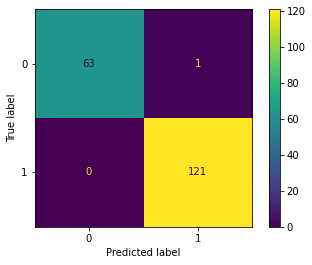

In [481]:
cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_)
disp.plot()
plt.show()

By the confusion matrix, True positive is more than double of False positive, fp is still significant which can affect the decision making of a start-up to invest.

In [482]:
cohen_kappa_score(y_test, y_test_pred)

0.9880111463936232

The cohen kappa as 0 shows that there is random agreement among raters

In [483]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
           1       0.99      1.00      1.00       121

    accuracy                           0.99       185
   macro avg       1.00      0.99      0.99       185
weighted avg       0.99      0.99      0.99       185



Even correcting the imbalancing before predicting is possible to see that the model is very good to predict if the start-up will be acquired but not so good that the start-up will not be acquired.

### Decision Tree

First parameters:

In [484]:
regr = DecisionTreeRegressor(max_depth=10,
                             criterion = 'squared_error',
                             min_samples_split=2,
                             min_samples_leaf = 1,
                             max_features = 6)
regr.fit(X_train_transformed, y_train_res)


DecisionTreeRegressor(max_depth=10, max_features=6)

In [485]:
y_pred_dt_te = regr.predict(X_test_norm)

In [487]:
y_pred_dt_tr = regr.predict(X_train_transformed)

In [488]:
print("The R2 for the Decision Tree (fp) in the TRAIN set is {:.2f}".format(regr.score(X_train_transformed, y_train_res)))
print("The R2 for the Decision Tree (fp) in the TEST  set is {:.2f}".format(regr.score(X_test_norm, y_pred_dt_te)))

The R2 for the Decision Tree (fp) in the TRAIN set is 0.87
The R2 for the Decision Tree (fp) in the TEST  set is 1.00


In [489]:
results1 = cross_validate(regr,X_train_transformed, y_train_res, cv = 5)
results1

{'fit_time': array([0.00499582, 0.00303531, 0.00200152, 0.00200081, 0.00352621]),
 'score_time': array([0.00099468, 0.00099826, 0.00099945, 0.00100017, 0.00100231]),
 'test_score': array([0.65682897, 0.57849433, 0.95505888, 0.76400313, 0.        ])}

In [490]:
cross_val_scores1 = cross_val_score(regr, X_train_transformed, y_train_res, cv=10)
print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores1)))

The mean R2 of the folds was 0.59


In [491]:
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_dt_te)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_dt_te)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_dt_te)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_dt_te)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_dt_te)))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

Second parameters:

In [492]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0) 
classifier.fit(X_train_transformed,y_train_res)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [493]:
y_pred_dt2_te = classifier.predict(X_test_norm)

In [495]:
y_pred_dt2_tr = classifier.predict(X_train_transformed)

In [496]:
cm_dt2 = confusion_matrix(y_test, y_pred_dt2_te)
cm_dt2

array([[ 63,   1],
       [  0, 121]], dtype=int64)

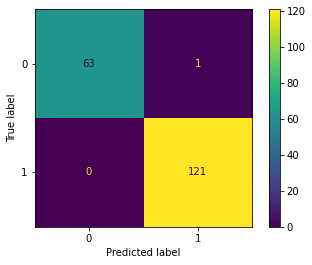

In [497]:
cm_dt2 = confusion_matrix(y_test, y_pred_dt2_te)

disp = ConfusionMatrixDisplay(cm_dt2,display_labels=classification.classes_)
disp.plot()
plt.show()

In [498]:
print("Train data R2 was: {:.2f}".format(classifier.score(X_train_transformed, y_train_res)))
print("Test data R2 was: {:.2f}".format(classifier.score(X_test, y_pred_dt2_te)))


Train data R2 was: 1.00
Test data R2 was: 0.66


c:\Users\pbevi\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [499]:
results2 = cross_validate(classifier,X_train_transformed, y_train_res, cv = 5)
results2

{'fit_time': array([0.00422668, 0.00334835, 0.00319839, 0.00400639, 0.00350714]),
 'score_time': array([0.00203919, 0.0010047 , 0.00106263, 0.00100112, 0.0020299 ]),
 'test_score': array([0.98395722, 0.97860963, 0.98395722, 0.98395722, 0.96774194])}

In [500]:
cross_val_scores2 = cross_val_score(classifier, X_train_transformed, y_train_res, cv=10)
print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores2)))

The mean R2 of the folds was 0.98


In [501]:
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_dt2_te)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_dt2_te)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_dt2_te)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_dt2_te)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_dt2_te)))

The accuracy in the TEST set is: 0.99
The precision in the TEST set is: 0.99
The recall in the TEST set is: 1.00
The F1 in the TEST set is: 1.00
The Kappa in the TEST set is: 0.99


In [502]:
decision_tree_accuracy= accuracy_score(y_test,y_pred_dt2_te)
decision_tree_accuracy

0.9945945945945946

### Random Forest

In [503]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train_transformed, y_train_res)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_transformed, y_train_res)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))


The R2 for the Random Forest in the TRAIN set is 0.99
The R2 for the Random Forest in the TEST  set is 0.65


c:\Users\pbevi\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


1    121
0     64
Name: success, dtype: int64

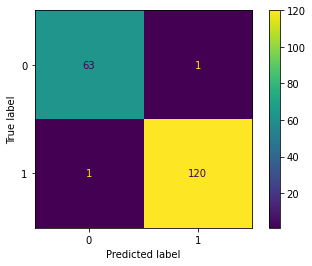

In [504]:
y_pred_rf = clf.predict(X_test_norm)
display(y_test.value_counts())
cm_rf=confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.show()

In [505]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_rf)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_rf)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_rf)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_rf)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_rf)))

The accuracy in the TEST set is: 0.99
The precision in the TEST set is: 0.99
The recall in the TEST set is: 0.99
The F1 in the TEST set is: 0.99
The Kappa in the TEST set is: 0.98


In [506]:
random_forest_accuracy=accuracy_score(y_test,y_pred_rf)
random_forest_accuracy

0.9891891891891892

In [507]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8)

# Train the model on training data
clf.fit(X_train_transformed, y_train_res)

cross_val_scores = cross_val_score(clf, X_train_transformed, y_train_res, cv=10)

print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores)))

The mean R2 of the folds was 0.98


In [508]:
cross_val_scores

array([0.9893617 , 0.95744681, 0.9893617 , 0.96808511, 0.98924731,
       0.98924731, 0.97849462, 0.97849462, 0.96774194, 0.98924731])

In [509]:
prediction = clf.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

0.34594594594594597
0.5881716976750462


c:\Users\pbevi\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [510]:
importances = list(zip(clf.feature_importances_.tolist(), X_train_transformed.columns.tolist()))
importances.sort(reverse=True)
display (importances)

[(0.5676050007604508, 'is_acquired'),
 (0.12202308169343433, 'relationships'),
 (0.042512701150471385, 'avg_participants'),
 (0.04195123862949187, 'milestones'),
 (0.0343760439661007, 'age_last_milestone_year'),
 (0.02779911812620714, 'is_top500'),
 (0.02580457915983424, 'funding_total_usd'),
 (0.02430826140247005, 'funding_rounds'),
 (0.021673487799726554, 'age_last_funding_year'),
 (0.019989292874575362, 'age_first_milestone_year'),
 (0.01643572450062149, 'age_first_funding_year'),
 (0.012974281754656, 'founded_at_year'),
 (0.006440893242626486, 'has_roundB'),
 (0.006138576824015406, 'first_funding_at_year'),
 (0.005274142533606793, 'has_VC'),
 (0.004689529350516905, 'has_roundD'),
 (0.0043825386323205085, 'last_funding_at_year'),
 (0.0043045187057140465, 'has_roundA'),
 (0.003051409709981238, 'is_otherstate'),
 (0.0022749590506473292, 'has_roundC'),
 (0.001768557788957688, 'is_othercategory'),
 (0.001276860697590622, 'is_CA'),
 (0.0009860347908535248, 'is_NY'),
 (0.00095791701150664

Text(0.5, 1.0, 'feature importance score')

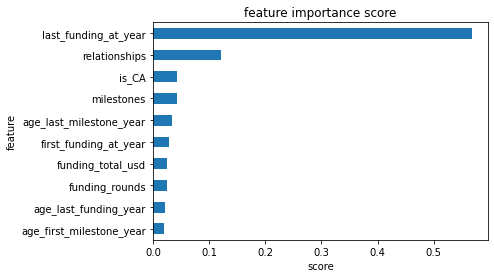

In [511]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
ax = importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

### KNN Model

In [512]:
# Instance and fit
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train_transformed, y_train_res)

# Score
score_knn = knn_model.score(X_test_norm, y_test)
score_knn

0.7228822314049586

### Comparing all models:

In [513]:
pd.DataFrame({ 'Logistic Regression classification' : [Logistic_Regression_classification_accuracy],        
              'Decision_Tree': [decision_tree_accuracy],
              'Random_Forest': [random_forest_accuracy],
              'KNN Regression': [score_knn]})

,Logistic Regression classification,Decision_Tree,Random_Forest,KNN Regression
0,0.994595,0.994595,0.989189,0.722882
